**Initialization of Pandas, sklearn, numpy, matplotlib.**

In [3]:
#import required libraries

#for data import and basic oprtaion
import pandas as pd
import numpy as np

#for visulization and plotting
import matplotlib.pyplot as plt


#to view the plots in the jupyter notebook inline
%matplotlib inline

#to create the confusion matrix
from sklearn import metrics

#to split the dataset into train and test
from sklearn.model_selection import train_test_split

#to apply logistic regresison
from sklearn.linear_model import LogisticRegression

- Marks1- Marks of the student in the 1st subject
- Marks2- Marks of the student in the 2nd subject
- Admission- Response variable which has value either 0 or 1.
- 1 means the student will get admission and 0 means no admission

In [6]:
import pandas as pd
df=pd.read_csv("./datasets/student_data.csv")


In [8]:
#check top records
df.head()

,Marks 1,Marks 2,Admission
0,75,70,0
1,80,85,1
2,65,60,0
3,90,95,1
4,85,75,1


In [10]:
#check info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Marks 1    100 non-null    int64
 1   Marks 2    100 non-null    int64
 2   Admission  100 non-null    int64
dtypes: int64(3)
memory usage: 2.5 KB


In [12]:
#split dataset in features and target variable
feature_cols = ['Marks 1', 'Marks 2']
X = df[feature_cols] # Features
y = df.Admission # Target variable

In [14]:
print(X.head())


   Marks 1  Marks 2
0       75       70
1       80       85
2       65       60
3       90       95
4       85       75


In [25]:
print(y.head())

0    0
1    1
2    0
3    1
4    1
Name: Admission, dtype: int64


**use the function train_test_split() which is a part of sklearn library. This has majorly 4 argument-**

- **Independent variable X**
- Dependent variable y
- Test_size-->This basically says the **percentage of records we want to put in the test dataset**.
- There is no specific rule on how much we should keep but ideally, it can be 40% or 30% or even 50%. This completely depends on the size of the dataset. If we have more samples, we can go ahead with more records in test dataset else less.
- As we just have 100 records in our dataset and so **keep 25% records in test dataset** and **the remaining 75% in training dataset.**
Random_state- to maintain the **reproducibility of the random splitted data**

In [32]:
#split the dataset in train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

X_train.shape



(75, 2)

In [34]:
X_test.shape

(25, 2)

**import the Logistic Regression module from sklearn.linear_model.**
- And then  create the logistic regression in python using LogisticRegression() function.

In [39]:
# instantiate the model using the default parameters
m1 = LogisticRegression()

# fit the model with data
m1.fit(X_train,y_train)

LogisticRegression()

**use the predict() function for the prediction on the test dataset.**
**It takes the testing dataset (X_test in our case) as an argument.**

In [42]:
#prediction on test dataset
y_pred=m1.predict(X_test)

y_test

26    0
86    0
2     0
55    1
75    1
93    1
16    0
73    1
54    1
95    1
53    1
92    0
78    1
13    1
7     1
30    0
22    0
24    1
33    1
8     1
43    1
62    0
3     1
71    1
45    1
Name: Admission, dtype: int64

In [44]:
y_pred

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1], dtype=int64)

In [46]:
y_test

26    0
86    0
2     0
55    1
75    1
93    1
16    0
73    1
54    1
95    1
53    1
92    0
78    1
13    1
7     1
30    0
22    0
24    1
33    1
8     1
43    1
62    0
3     1
71    1
45    1
Name: Admission, dtype: int64

**A confusion matrix** is basically a two-way frequency table which is used to find the accuracy and error of the model. This tells about the number of correct and incorrect predictions for both 1 and o.

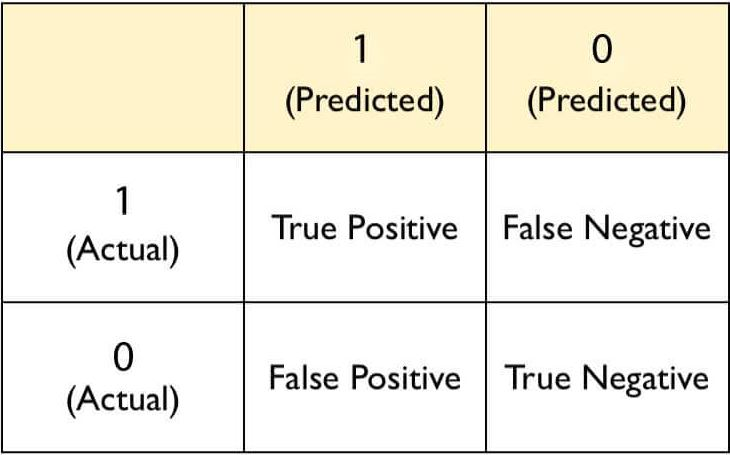

In [51]:
#confusion matrix
c1 = metrics.confusion_matrix(y_pred, y_test)
print(c1)

print("actual correct matrix")
tp=c1[1][1]
tn=c1[0][0]
fp=c1[0][1]
fn=c1[1][0]
print(np.array([tp,fn,fp,tn]))

[[ 8  0]
 [ 0 17]]
actual correct matrix
[17  0  0  8]


**Accuracy- This is being given by the same confusion matrix which we drew above
Precision- It’s about being precise! Means how accurate our model is
Recall- Test for how correctly our model is able to predict that the students have got admissi**on

In [54]:
#evaluation metrices
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


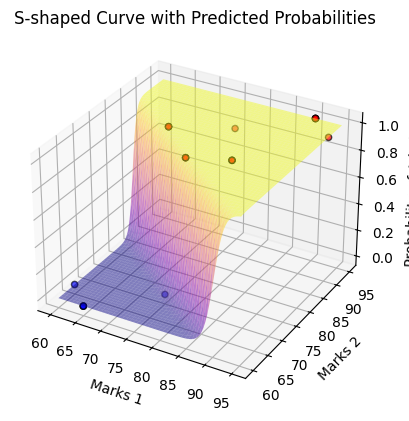

In [56]:
# Generate a grid of feature values for both Marks 1 and Marks 2
marks1_values = np.linspace(X_test['Marks 1'].min(), X_test['Marks 1'].max(), 100)
marks2_values = np.linspace(X_test['Marks 2'].min(), X_test['Marks 2'].max(), 100)
marks1_mesh, marks2_mesh = np.meshgrid(marks1_values, marks2_values)
feature_grid = np.c_[marks1_mesh.ravel(), marks2_mesh.ravel()]

# Predict probabilities using the trained model
probabilities = m1.predict_proba(feature_grid)[:, 1].reshape(marks1_mesh.shape)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the S-shaped curve
ax.plot_surface(marks1_mesh, marks2_mesh, probabilities, cmap='plasma',alpha=0.5)

# Scatter plot the training data points
ax.scatter(X_test['Marks 1'], X_test['Marks 2'], y_pred, c=y_pred, cmap='bwr', edgecolors='k')
# Change the viewing angle

ax.set_xlabel('Marks 1')
ax.set_ylabel('Marks 2')
ax.set_zlabel('Probability of Admission')
ax.set_title('S-shaped Curve with Predicted Probabilities')
plt.show()